In [8]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-11-08 00:25:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.2.112, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   194MB/s    in 0.3s    

2020-11-08 00:25:30 (194 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [9]:
! unzip -q cats_and_dogs_filtered.zip

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [12]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
import numpy as np

In [5]:
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=validation_dir, target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Reescribir la red utilizando el método funcional y definiendo una función de ayuda.

In [35]:
import tensorflow as tf
## inputs = Input(shape=(224,224,3)), etc.
def create_block(n_filters, n_layers, inputs):
    '''
    Entradas:
     n_filters: numero de filtros del bloque
     n_layers: número de capas del bloque
     inputs: tensor de entrada
    Retorna:
     tensor de salida con las capas aplicadas
    '''
    # usar un bucle for para agregar n_layers capas convolucionales
    # luego, agregar la capa MaxPool2D y retornarla
    for i in range(n_layers):
      inputs = Conv2D(filters=n_filters,kernel_size=(3,3),padding="same", activation="relu")(inputs)
    inputs = MaxPool2D(pool_size=(2,2),strides=(2,2))(inputs)
    return inputs
    
# reemplazar los bloques usando la función create_block
nn_layers_definition = [
  ( 64, 2), # num filters, num layers
  ( 128, 2),
  ( 256, 3),
  ( 512, 3),
  ( 512, 3)
]

inputs = Input(shape=(224,224,3))
x = inputs
for e in nn_layers_definition:
  x = create_block(e[0], e[1], x)
x = Flatten()(x)
x = Dense(units=4096,activation="relu")(x)
x = Dense(units=4096,activation="relu")(x)
outputs = Dense(units=2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)
# etc.

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
model.compile(optimizer=Adam(lr=0.0001), loss=categorical_crossentropy, 
                   metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)      

In [25]:
"""
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()
"""

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 56, 56, 256)      

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq=1000)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [37]:
hist = model.fit_generator(
    generator=traindata, 
    steps_per_epoch=traindata.samples/traindata.batch_size,    
    validation_data= testdata, 
    validation_steps=testdata.samples/testdata.batch_size,
    epochs=30,callbacks=[checkpoint,early])

Epoch 1/30
63/62 [==============================] - 29s 465ms/step - loss: 1.0240 - accuracy: 0.5200 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 2/30
63/62 [==============================] - 29s 466ms/step - loss: 0.6772 - accuracy: 0.5840 - val_loss: 0.6827 - val_accuracy: 0.5330
Epoch 3/30
63/62 [==============================] - 30s 476ms/step - loss: 0.6950 - accuracy: 0.5125 - val_loss: 0.6877 - val_accuracy: 0.5100
Epoch 4/30
63/62 [==============================] - 30s 475ms/step - loss: 0.6551 - accuracy: 0.6230 - val_loss: 0.6371 - val_accuracy: 0.6750
Epoch 5/30
63/62 [==============================] - 30s 473ms/step - loss: 0.6336 - accuracy: 0.6500 - val_loss: 0.6303 - val_accuracy: 0.6740
Epoch 6/30
63/62 [==============================] - 30s 472ms/step - loss: 0.5848 - accuracy: 0.6815 - val_loss: 0.5775 - val_accuracy: 0.6960
Epoch 7/30
63/62 [==============================] - 30s 472ms/step - loss: 0.5672 - accuracy: 0.7140 - val_loss: 0.6211 - val_accuracy: 0.6650

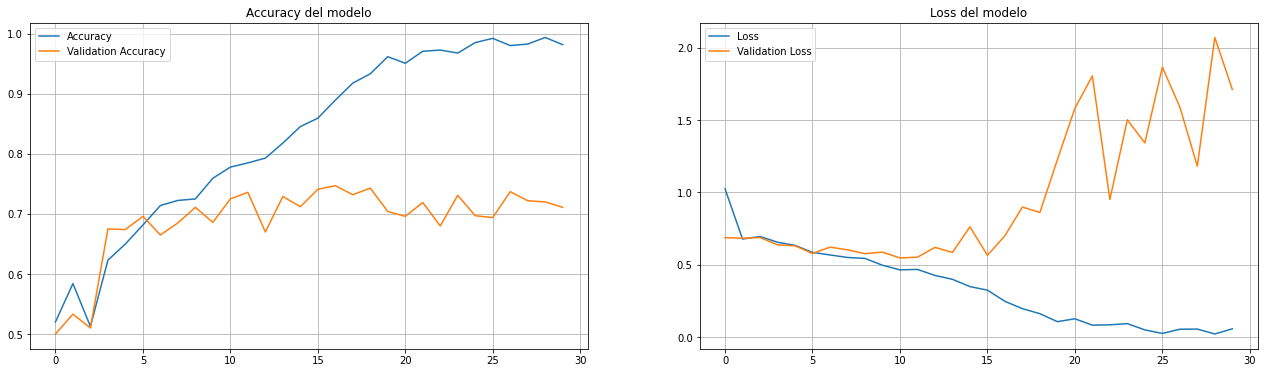

In [38]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(22,6))
axes[0].plot(hist.history["accuracy"])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_title("Accuracy del modelo")
axes[0].legend(["Accuracy","Validation Accuracy"])
axes[0].grid(which="Both")
axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_title("Loss del modelo")
axes[1].legend(["Loss","Validation Loss"])
axes[1].grid(which="Both")
plt.show()

In [48]:
!cp cats_and_dogs_filtered/validation/cats/cat.2042.jpg ejemplo-cat.jpg
!cp cats_and_dogs_filtered/validation/dogs/dog.2042.jpg ejemplo-dog.jpg

cat


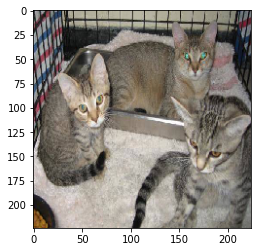

In [53]:
from tensorflow.keras.preprocessing import image

def predict_from_img_file(filename):
  img = image.load_img(filename,target_size=(224,224))
  img = np.asarray(img)
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  output = model.predict(img)
  if output[0][0] > output[0][1]:
      print("cat")
  else:
      print('dog')

predict_from_img_file("ejemplo-cat.jpg")

dog


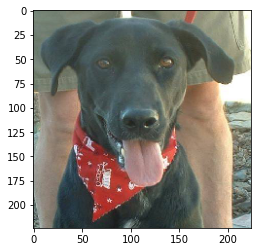

In [54]:
predict_from_img_file("ejemplo-dog.jpg")